In [16]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs
# pretty dosplay for notebooks
%matplotlib inline
# load data
in_file='titanic_data.csv'
full_data=pd.read_csv(in_file)
display(full_data.head(1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# store the outcome and drop the data
outcome=full_data['Survived']
data=full_data.drop('Survived',axis=1)

In [9]:
# create a function to measure the accuracy of the model
def accuracy_score(truth,pred):
   # display((truth==pred).head(5))
    if(len(truth)==len(pred)):
        return "Prediction accuracy {:.2f}%".format((truth==pred).mean()*100)
    else:
        return "No# of Prediction doesnt match with outcome"
#prediction=pd.Series(np.ones(5,dtype=int))
#accuracy_score(outcome[:5],prediction)

'Prediction accuracy 60.00%'

In [11]:
# model with no feature data  .. will always predict 0 Survival since most of the people died
def prediction_0(data):
    predictions=[]
    for s in data.iterrows():
        predictions.append(0)
    return pd.Series(predictions)
    
predictions=prediction_0(data)
accuracy_score(outcome,predictions)

'Prediction accuracy 61.62%'

In [67]:
# prediction model to predict if Male perished if female survived
def predictions_1(data):
    predictions=[]
    cnt=0
    for index, row in data.iterrows():
        if row['Sex']=='male':
            predictions.append(0)
            cnt=cnt+1
        else:
            predictions.append(1)
    print(cnt)
    return pd.Series(predictions)
predictions=predictions_1(data)
accuracy_score(outcome,predictions)

577


'Prediction accuracy 78.68%'

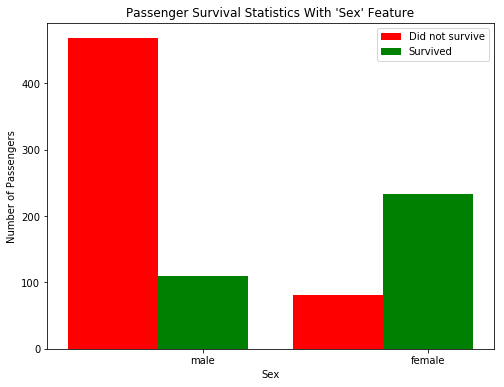

In [19]:
vs.survival_stats(data,outcome,'Sex')

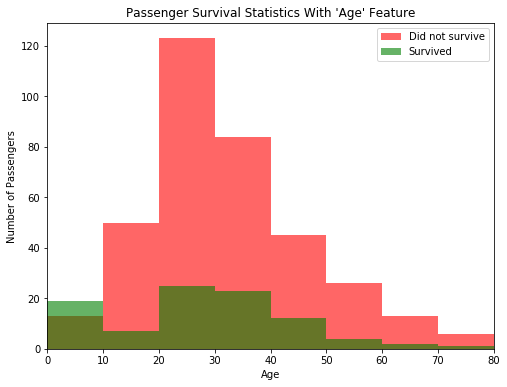

In [161]:
vs.survival_stats(data, outcome, 'Age', ["Sex == 'male'"]) # Age & Sex wise Survivals for  Male paasengers

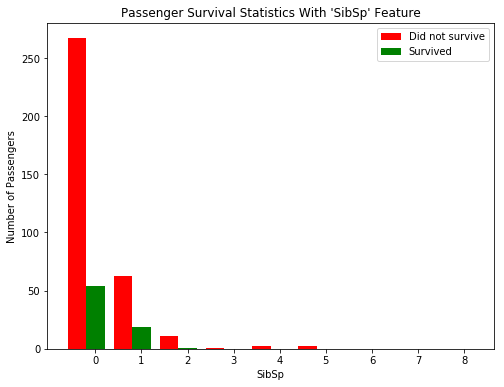

In [89]:
vs.survival_stats(data, outcome, 'SibSp',["Sex == 'male'", "Age > 10"]) # SibSp wise Survivals

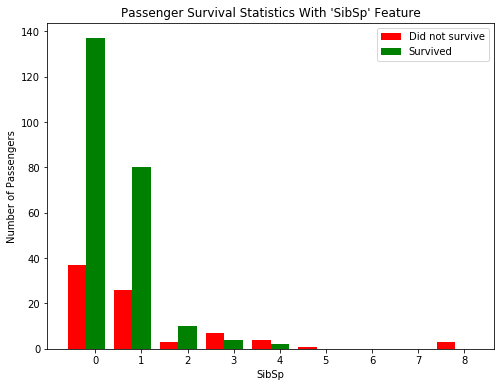

In [91]:
vs.survival_stats(data, outcome, 'SibSp',["Sex == 'female'"]) # SibSp wise Survivals

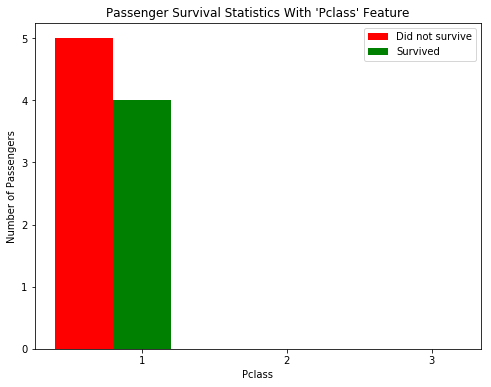

In [122]:
vs.survival_stats(data, outcome, 'Pclass',["Sex == 'male'","SibSp > 0","Fare > 100"]) # SibSp wise Survivals

In [119]:
# prediction 5 model to consider 50% of Females in 3rd Class
def predictions_5(data):
    predictions=[]
    #cnt=0
    for index, row in data.iterrows():
        if row['Sex']=='male':
            if row['Age']<=10:
                predictions.append(1)
            else:
                predictions.append(0)
        #cnt=cnt+1
       
        else:
            if row['Pclass']==3:
                if index%2==1:
                    predictions.append(0) 
                else:
                    predictions.append(1)
            else:
                predictions.append(1)
            
    #print(cnt)
    return pd.Series(predictions)
predictions=predictions_5(data)
accuracy_score(outcome,predictions)

'Prediction accuracy 78.68%'

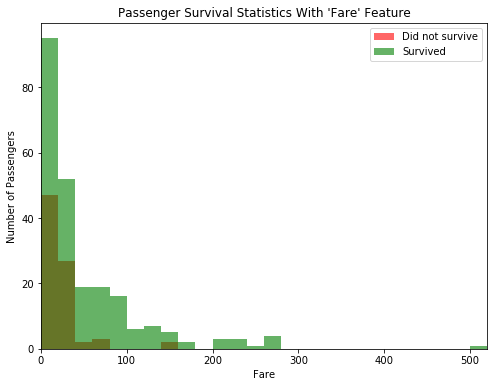

In [88]:
vs.survival_stats(data, outcome, 'Fare',["Sex == 'female'"]) # SibSp wise Survivals

In [156]:
# prediction 3 model to consider All Passengers Younger than 10 survived
def predictions_2(data):
    predictions=[]
    cnt=0
    for index, row in data.iterrows():
        if row['Sex']=='male':
            if row['Age']<=10:
                predictions.append(1)
            else:
                predictions.append(0)
            cnt=cnt+1
       
        else:
            predictions.append(1)
            
    print(cnt)
    return pd.Series(predictions)
predictions=predictions_2(data)
accuracy_score(outcome,predictions)

577


'Prediction accuracy 79.24%'

In [108]:
# prediction 4 model to consider better survival with Ticket Price
def predictions_4(data):
    predictions=[]
    cnt=0
    for index, row in data.iterrows():
        if row['Sex']=='male':
            if row['Age']<=10:
                predictions.append(1)
            else:
                if row['Fare']>75:
                   predictions.append(1)
                else:
                    predictions.append(0)
        #cnt=cnt+1
        else:
            predictions.append(1)
            
    print(cnt)
    return pd.Series(predictions)
predictions=predictions_4(data)
accuracy_score(outcome,predictions)

0


'Prediction accuracy 78.23%'

In [50]:
#data[data['Sex']=='male'][data['Age']>10].describe()

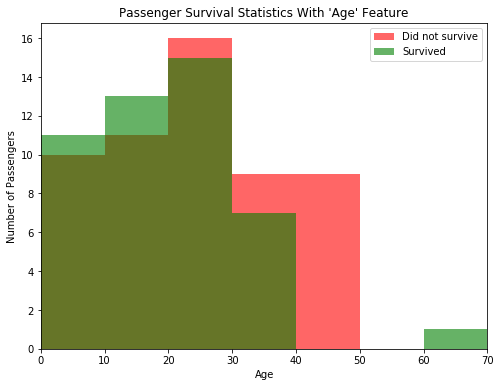

In [227]:
vs.survival_stats(data, outcome, 'Age', ["Pclass == 3","Sex == 'female'"])#"Sex == 'male'", "Age > 10", 

In [236]:
# prediction 8 model to consider All Passengers Younger than 10 survived
def predictions_8(data):
    predictions=[]

    for index, row in data.iterrows():
        if row['Sex']=='male':
            if row['Age']<=10:
                predictions.append(1)
            else:
                predictions.append(0)
            #cnt=cnt+1
       
        else: # consider class 3 females between age 40-50 perished
            if row['Age']>=40 and row['Age']<=60 and row['Pclass']==3:
                predictions.append(0)
            else:
                predictions.append(1)

    return pd.Series(predictions)
predictions=predictions_8(data)
accuracy_score(outcome,predictions)

'Prediction accuracy 80.25%'

In [216]:
# prediction 6 model to consider Male in 1st Class Age<40 Survived
def predictions_6(data):
    predictions=[]
    cnt=0
    for index, row in data.iterrows():
        if row['Sex']=='male':
            if row['Age']<=10:
                predictions.append(1)
            else:
                if row['Age']<=40 and row['Age']>10 or row['Pclass']==1:
                    predictions.append(1)
                    cnt=cnt+1
                else:
                    predictions.append(0)
            
       
        else:
            predictions.append(1)
            
    print(cnt)
    return pd.Series(predictions)
predictions=predictions_6(data)
accuracy_score(outcome,predictions)

389


'Prediction accuracy 52.41%'

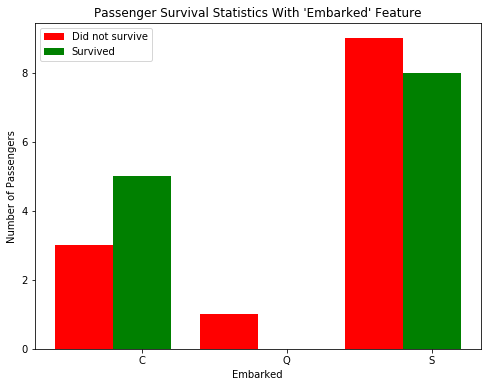

In [251]:
vs.survival_stats(data, outcome, 'Embarked',["Sex == 'male'","Pclass == 1","SibSp > 0", "Age < 50","Age > 10"]) #[, "Age > 10", "Pclass == 1","SibSp == 0",]

In [256]:
# prediction 9 model to consider All Passengers Younger than 10 survived
def predictions_9(data):
    predictions=[]

    for index, row in data.iterrows():
        if row['Sex']=='male': # Aiminng to improve on Male Survival at Class=1
            if row['Age']<=10:
                predictions.append(1)
#             if row['Pclass']==1 and row['Age']>20 and row['Age']<=50:
#                 predictions.append(1)
            else:
                predictions.append(0)
            #cnt=cnt+1
       
        else: # consider class 3 females between age 40-50 perished
            if row['Age']>=40 and row['Age']<=60 and row['Pclass']==3:
                predictions.append(0)
            else:
                predictions.append(1)

    return pd.Series(predictions)
predictions=predictions_9(data)
accuracy_score(outcome,predictions)

'Prediction accuracy 80.25%'

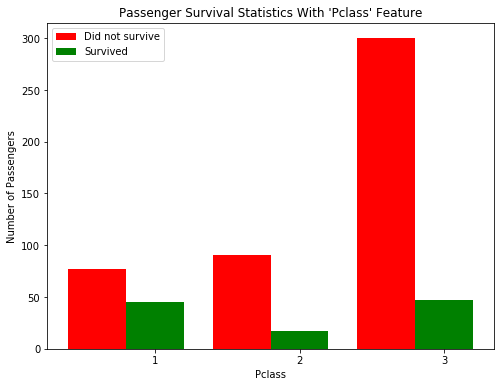

In [223]:
vs.survival_stats(data, outcome, 'Pclass',["Sex == 'male'"])#, "Age > 10", "Pclass == 1"

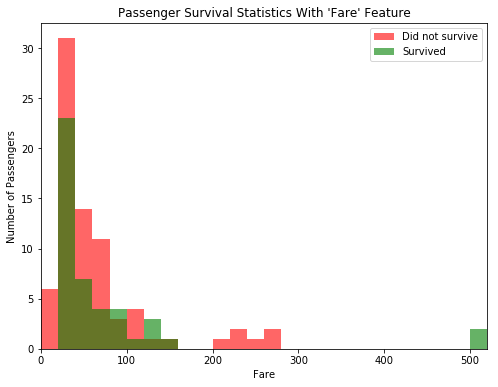

In [215]:
vs.survival_stats(data, outcome, 'Fare',["Sex == 'male'", "Pclass == 1"]) # "Sex == 'female'","Pclass == 3"

In [207]:
# prediction 7 model to consider All Passengers Younger than 10 survived
def predictions_7(data):
    predictions=[]
    cnt=0
    for index, row in data.iterrows():
        if row['Sex']=='male':
            if row['Age']<=10:
                predictions.append(1)
            else:
                predictions.append(0)
            cnt=cnt+1
       
        else:
            predictions.append(1)
            
    print(cnt)
    return pd.Series(predictions)
predictions=predictions_7(data)
accuracy_score(outcome,predictions)

577


'Prediction accuracy 79.24%'

In [177]:
data[(data['Sex']=='female') & (data['Age']>40) & (data['Age']<50) & (data['Pclass']==3)].count()

PassengerId    8
Pclass         8
Name           8
Sex            8
Age            8
SibSp          8
Parch          8
Ticket         8
Fare           8
Cabin          0
Embarked       8
dtype: int64

In [185]:
full_data[(full_data['Sex']=='female') & (full_data['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
